## 主成分分析の概要
主成分分析は、多くの変数を持つデータを、情報の損失を最小限に抑えつつ、より少ない数の新しい変数（主成分）に要約する手法です。これは教師なし学習に分類され、データの全体的な構造を把握するのに役立ちます。


### 主成分分析の特徴
- **次元削減**： 多次元データをより少ない次元で表現します。
- **情報の集約**： データの分散を最大化する方向（主成分）を見つけます。
- **データの可視化**： 高次元データを2次元や3次元で表現することができます。
- **ノイズ除去**： 小さな主成分を除外することで、データのノイズを軽減できます。


###主要な概念
- **主成分**： データの特徴を表す新しい軸です。
- **主成分負荷量**：各変数が主成分にどれだけ寄与しているかを示します。
- **寄与率**：各主成分がデータの全分散をどの程度説明しているかを示します。
- **主成分得点**：元のデータを主成分空間に射影した値です。


### 応用例
- **市場調査**：顧客満足度調査などで複数の要因を総合的に評価します。
- **画像処理**：画像の圧縮や特徴抽出に利用されます。
- **金融**：リスク分析やポートフォリオ管理に活用されます。
- **生物学**：遺伝子発現データの解析などに用いられます。


### 注意点
- **主成分の解釈**：各主成分が具体的に何を表しているかの解釈は、分析者の判断に委ねられます。
- **外れ値の影響**：外れ値が分析結果に大きく影響する可能性があります。
- **非線形関係**：線形変換に基づくため、非線形関係を持つデータには適さない場合があります。
- **主成分の数の選択**：適切な主成分の数を選ばないと、情報の損失や誤差の強調が起こる可能性があります。


### 因子分析との違い
主成分分析は全体的な構造把握を目的とし、因子分析は潜在的な構造の発見を目的としています。主成分分析では主成分の意味付けが困難な場合がありますが、因子分析では因子に具体的な意味付けが可能です。

主成分分析は、データの次元削減や特徴抽出において強力なツールですが、その適用には適切な理解と注意が必要です。結果の解釈には慎重さが求められ、他の分析手法と組み合わせて使用することで、より深い洞察を得ることができます。

###主成分分析

主成分分析とは、多くの変数を持つデータを集約して主成分を作成する統計的分析手法です。 何かを予測する教師あり学習ではなく、教師なし学習にあたります。 主成分とはデータの特徴を表す要素のことで、「第一主成分、第二主成分・・・」という形で表現します。



まずは、使用するデータを作成する

In [ ]:
!pip install pandas openpyxl

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# ファイル名を指定してExcelファイルを読み込む
df = pd.read_csv("/content/drive/MyDrive/PCA_Sample_Data.csv")

# データの先頭を表示する
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.496714,0.312619,0.119327,0.403453,0.302003
1,-0.234137,-0.277992,-0.326652,-0.579852,-0.441481
2,-0.463418,-0.729863,-0.639080,-0.298050,-0.561808
3,-0.562288,-0.515848,-0.545497,-0.489859,-0.313520
4,1.465649,1.319085,1.085720,1.162039,1.395634


まずはグラフを描いてみましょう。

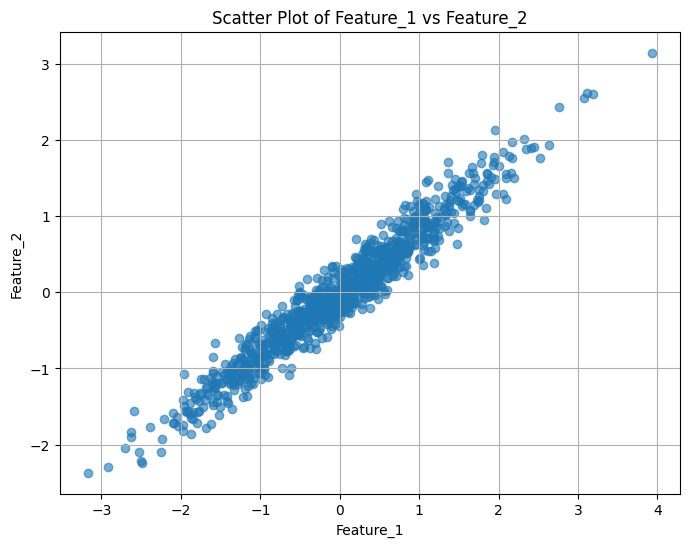

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot between Feature_1 and Feature_2
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], alpha=0.6)
plt.title('Scatter Plot of Feature_1 vs Feature_2')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.show()


これを正規化します。

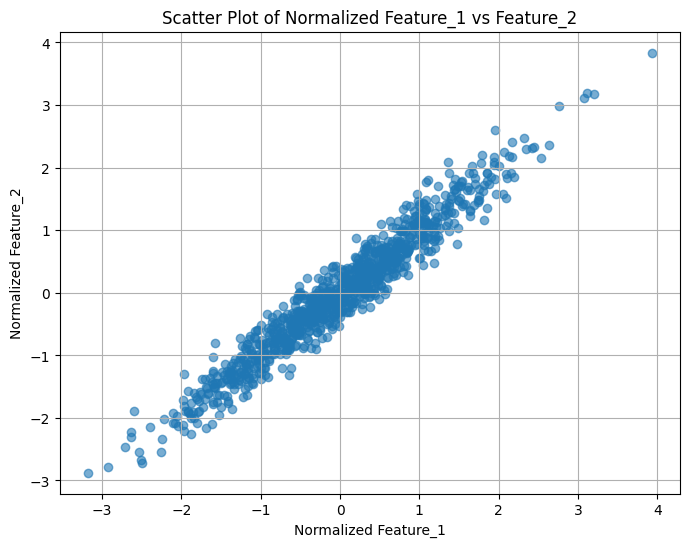

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plotting the scatter plot between normalized Feature_1 and Feature_2
plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['Feature_1'], df_normalized['Feature_2'], alpha=0.6)
plt.title('Scatter Plot of Normalized Feature_1 vs Feature_2')
plt.xlabel('Normalized Feature_1')
plt.ylabel('Normalized Feature_2')
plt.grid(True)
plt.show()


##主成分分析

In [ ]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# If 'ace_tools' is a custom module, install it using pip if you have it locally
# !pip install ace_tools

# import ace_tools as tools; tools.display_dataframe_to_user(name="PCA Result", dataframe=df_pca)

# Alternatively, display the DataFrame using standard pandas functionality
print(df_pca)

     Principal Component 1  Principal Component 2
0                 0.905290               0.037623
1                -1.067878               0.025657
2                -1.504205              -0.185242
3                -1.343329               0.198760
4                 3.597084               0.315471
..                     ...                    ...
995              -2.628411               0.004328
996              -1.989327               0.300206
997               3.239498               0.217652
998              -4.266252              -0.102659
999               0.125162              -0.176910

[1000 rows x 2 columns]
